<AxesSubplot:xlabel='timeline'>

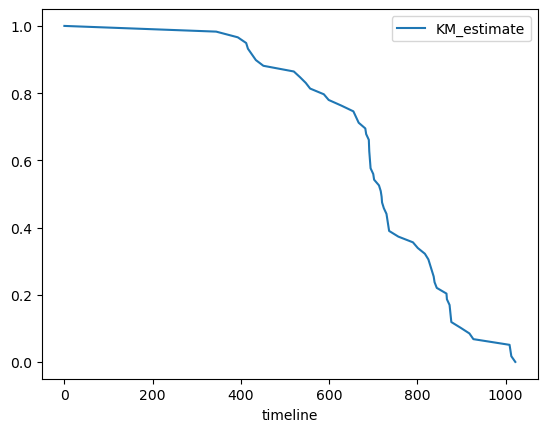

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from lmfit import Model
from scipy.interpolate import UnivariateSpline
from lifelines import KaplanMeierFitter
from lifelines import WeibullFitter

data = np.loadtxt("life_expectancy.txt")

df = pd.DataFrame(data, columns=['life_expectancy'])
kmf = KaplanMeierFitter()

kmf.fit(df['life_expectancy']) # Эмпирическая функция дожития
kmf.survival_function_.plot()


<AxesSubplot:xlabel='timeline'>

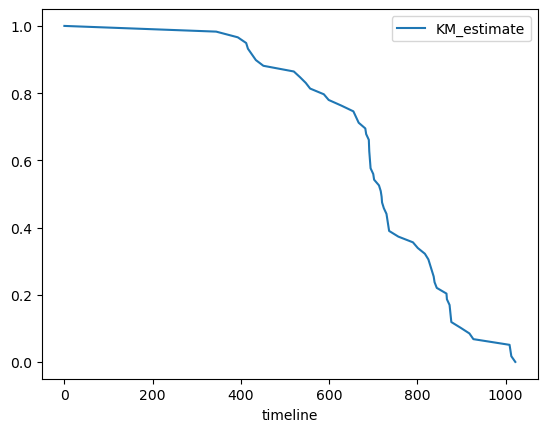

In [28]:
# Условная функция дожития 
t = 1200
kmf.fit(df['life_expectancy'], event_observed=df['life_expectancy'] < t)
kmf.survival_function_.plot()

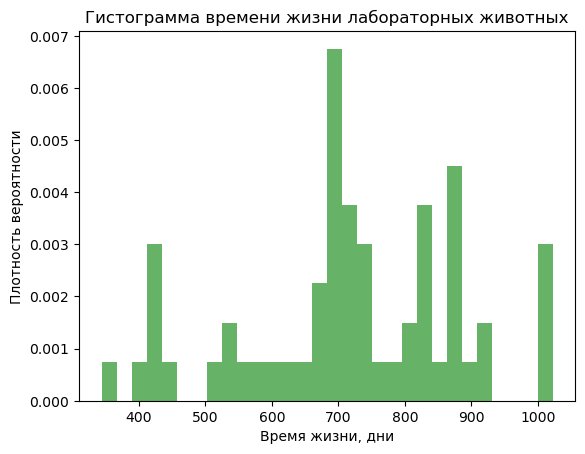

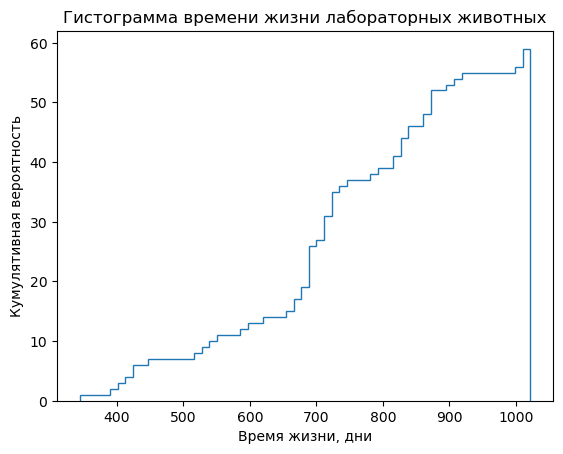

In [47]:
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Время жизни, дни')
plt.ylabel('Плотность вероятности')
plt.title('Гистограмма времени жизни лабораторных животных')
plt.show()

plt.hist(data, histtype='step', cumulative=True, bins=len(data))
plt.xlabel('Время жизни, дни')
plt.ylabel('Кумулятивная вероятность')
plt.title('Гистограмма времени жизни лабораторных животных')
plt.show()

               coef   se(coef)  coef lower 95%  coef upper 95%  cmp to  \
lambda_  783.812359  20.782287      743.079824      824.544893     1.0   
rho_       5.165079   0.530695        4.124936        6.205223     1.0   

                 z              p     -log2(p)  
lambda_  37.667286  1.705538e-310  1029.027483  
rho_      7.848345   4.215642e-15    47.753169  


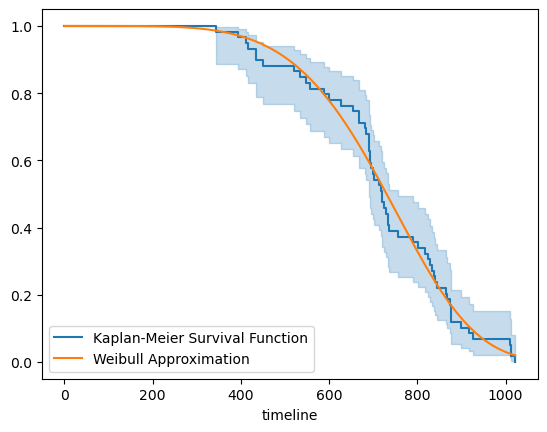

In [44]:

kmf = KaplanMeierFitter()
kmf.fit(df['life_expectancy'])

# Эмпирическая кривая дожития Kaplan-Meier
kmf.plot_survival_function(label='Kaplan-Meier Survival Function')

wf = WeibullFitter()
wf.fit(df['life_expectancy'])

print(wf.summary) #

lambda_ = wf.lambda_
rho = wf.rho_

## Аппроксимированная кривая дожития Вейбулла
t_values = np.linspace(0, df['life_expectancy'].max(), 1000)
survival_function_weibull = np.exp(-(t_values / lambda_) ** rho)
plt.plot(t_values, survival_function_weibull, label='Weibull Approximation')

plt.legend()
plt.show()


- Параметр lambda (λ) ~ 783.81 со стандартной ошибкой se(coef)~20.78. Доверительный интервал для lambda от 743.08 до 824.54.
- Параметр rho (ρ) ~ 5.17 со стандартной ошибкой se(coef) ~ 0.53. Доверительный интервал для rho от 4.12 до 6.21